# 📈 Part 9: Seaborn & Pandas Integration (Mapping from Matplotlib Part 4)

**Goal:** Understand how Seaborn is the *best* tool for plotting directly from Pandas DataFrames. Where Matplotlib's `.plot()` method provides a quick entry, Seaborn provides a powerful, consistent, and data-aware grammar for the same task.

---

### Key Learning Objectives
1.  Replace Pandas' `.plot(kind='...')` methods with their Seaborn equivalents: `sns.lineplot`, `sns.barplot`, `sns.histplot`, and `sns.countplot`.
2.  Understand Seaborn's main plotting syntax: `sns.plot_type(data=df, x='column_name', y='column_name')`.
3.  Use the `hue` parameter to automatically create grouped plots and legends (a major upgrade from Matplotlib's manual legend handling).
4.  Combine Seaborn's **Axes-level** functions with `plt.subplots()` to build a Pandas-driven dashboard.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib # Keep for version checking if desired

# Set Seaborn theme
sns.set_theme(style="ticks") 

print("🎯 LAB 9.1: ENVIRONMENT SETUP")
print("✅ Seaborn, Matplotlib, and pandas imported successfully!")

# Load or create Titanic sample data (Ensure this is available)
titanic_data = pd.DataFrame({
    'Age': [22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, 2, 
             31, 25, 8, 19, 40, 66, 28, 42, 21, 18, 14, 40, 27, 3, 45, 33],
    'Fare': [7.25, 71.28, 7.92, 53.10, 8.05, 51.86, 21.08, 11.13, 30.07, 16.70,
             26.55, 8.05, 31.0, 7.85, 16.0, 29.12, 26.0, 7.90, 21.08, 7.25,
             227.52, 10.5, 26.0, 13.0, 7.74, 7.05, 46.90, 26.55, 7.23, 21.08, 26.25, 7.75],
    'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 
             'male', 'female', 'female', 'male', 'male', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'male',
             'male', 'female', 'male', 'female'],
    'Pclass': [3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3,
                1, 2, 2, 3, 3, 3, 1, 1, 3, 3, 2, 3],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
                  1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1]
})

🎯 LAB 9.1: ENVIRONMENT SETUP
✅ Seaborn, Matplotlib, and pandas imported successfully!


## 1. Plotting Directly from DataFrames: The Seaborn Way

In Matplotlib (and Pandas), you often did `df['col'].plot(kind='hist')`.

In Seaborn, you pass the **entire DataFrame** to the `data=` parameter and then use strings to specify which columns to use for `x=` and `y=`. This is a much cleaner and more powerful syntax.

* `df.plot(kind='line')` -> `sns.lineplot(data=df, ...)`
* `df.plot(kind='hist')` -> `sns.histplot(data=df, ...)`
* `df.plot(kind='bar')` -> `sns.barplot(data=df, ...)` or `sns.countplot(data=df, ...)`

🎯 LAB 9.2: Direct Plotting Comparisons


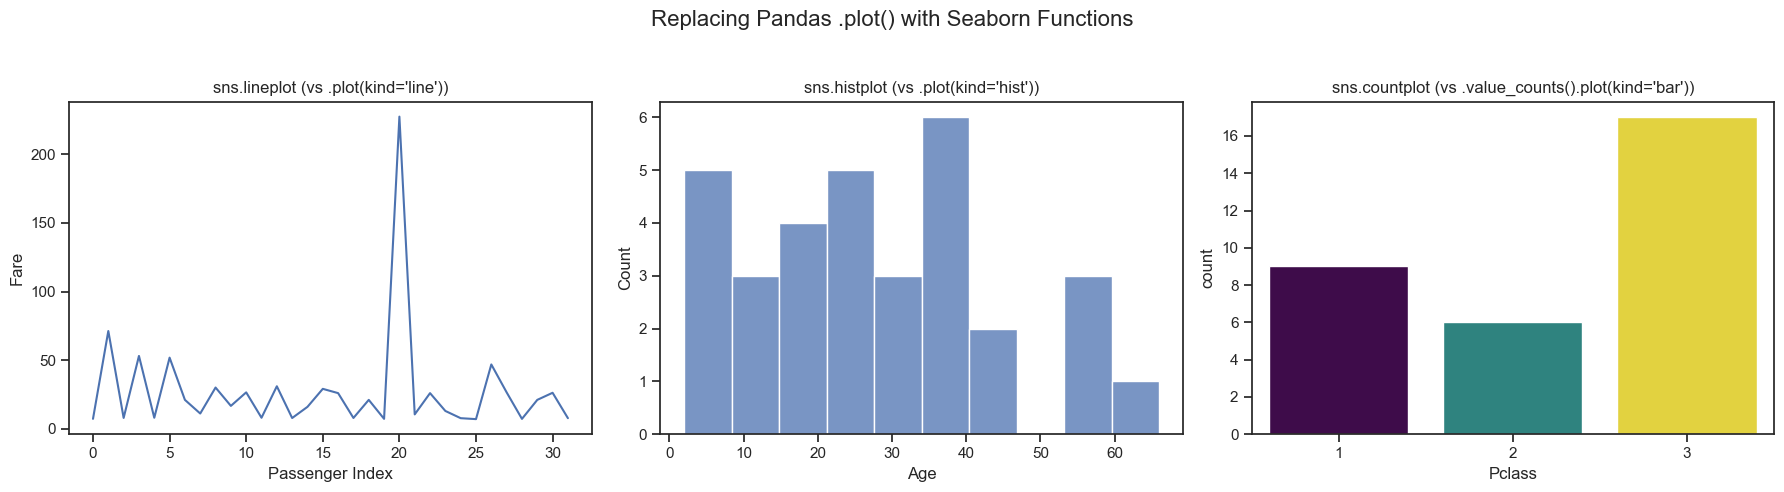


🎉 Seaborn is more expressive: `sns.countplot` is one line vs. Pandas' two-step `value_counts().plot()`.


In [2]:
print("🎯 LAB 9.2: Direct Plotting Comparisons")

# Create a figure for our plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Replacing Pandas .plot() with Seaborn Functions", fontsize=16)

# 1. Line Plot
# Pandas: titanic_data['Fare'].plot(kind='line', ax=axes[0])
# Seaborn: We must provide an x-axis. We'll use the DataFrame's index.
sns.lineplot(data=titanic_data, x=titanic_data.index, y='Fare', ax=axes[0])
axes[0].set_title("sns.lineplot (vs .plot(kind='line'))")
axes[0].set_xlabel("Passenger Index")

# 2. Histogram
# Pandas: titanic_data['Age'].plot(kind='hist', ax=axes[1])
# Seaborn:
sns.histplot(data=titanic_data, x='Age', bins=10, ax=axes[1])
axes[1].set_title("sns.histplot (vs .plot(kind='hist'))")

# 3. Bar Plot (for counts)
# Pandas: titanic_data['Pclass'].value_counts().plot(kind='bar', ax=axes[2])
# Seaborn: sns.countplot does this in one step!
sns.countplot(data=titanic_data, x='Pclass', 
              hue='Pclass', # Use x-var for hue to enable palette
              palette='viridis', 
              ax=axes[2], 
              legend=False) # Disable legend
axes[2].set_title("sns.countplot (vs .value_counts().plot(kind='bar'))")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("\n🎉 Seaborn is more expressive: `sns.countplot` is one line vs. Pandas' two-step `value_counts().plot()`.")

## 2. Customizing Plots & Automatic Legends

Customization in Seaborn is a mix of:
1.  **Seaborn parameters:** Using arguments like `color`, `linestyle`, or `palette` inside the plot function.
2.  **Matplotlib methods:** Using `ax.set_title()`, `ax.set_xlabel()`, etc., on the axes object after plotting.

A key feature is the `hue` parameter. By setting `hue='column_name'`, Seaborn automatically groups the data, applies different colors, and **builds a legend for you.**

🎯 LAB 9.3: Customization and Automatic Legends with `hue`


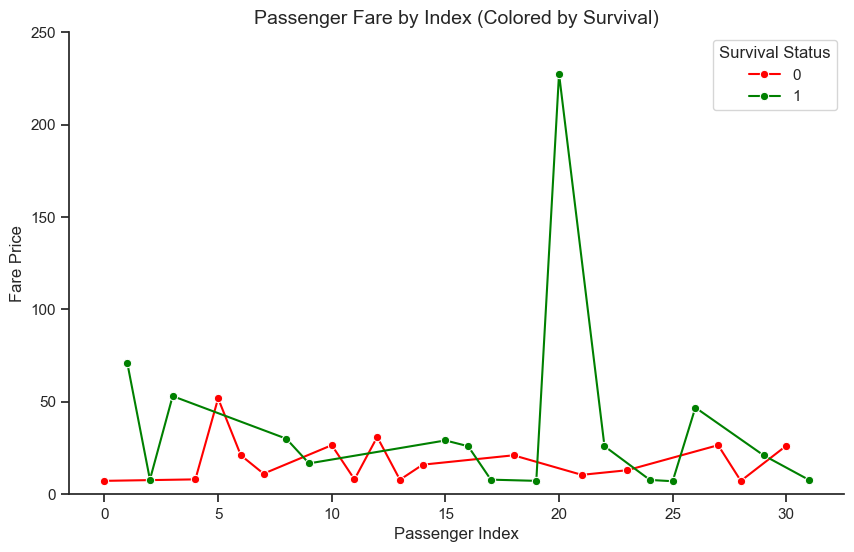


✅ The `hue` parameter automatically handled grouping and legend creation.


In [3]:
print("🎯 LAB 9.3: Customization and Automatic Legends with `hue`")

# Create a Matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# 1. Plotting with `hue`
# Seaborn splits the data by 'Survived', applies colors, and creates a legend
sns.lineplot(
    data=titanic_data, 
    x=titanic_data.index, 
    y='Fare', 
    hue='Survived', # Automatically create two lines
    palette={0:'red', 1:'green'}, # Assign colors
    marker='o',
    ax=ax
)

# 2. Customizing with Matplotlib methods
ax.set_title("Passenger Fare by Index (Colored by Survival)", fontsize=14)
ax.set_xlabel("Passenger Index")
ax.set_ylabel("Fare Price")
ax.set(ylim=(0, 250)) # Set y-limit

# Optional: Customize the legend title (Matplotlib method)
ax.get_legend().set_title('Survival Status')

sns.despine() # Remove top and right spines
plt.show()

print("\n✅ The `hue` parameter automatically handled grouping and legend creation.")

## 3. Practice Project: Rebuilding the Dashboard (Seaborn + Pandas)

Let's rebuild the dashboard from Part 4's project. This reinforces the pattern of creating a Matplotlib grid (`plt.subplots`) and passing each `ax` object to different Seaborn axes-level functions.

🎯 LAB 9.4: PRACTICE PROJECT - Rebuilding the Dashboard
💾 Plot saved as 'seaborn_part9_dashboard.png'


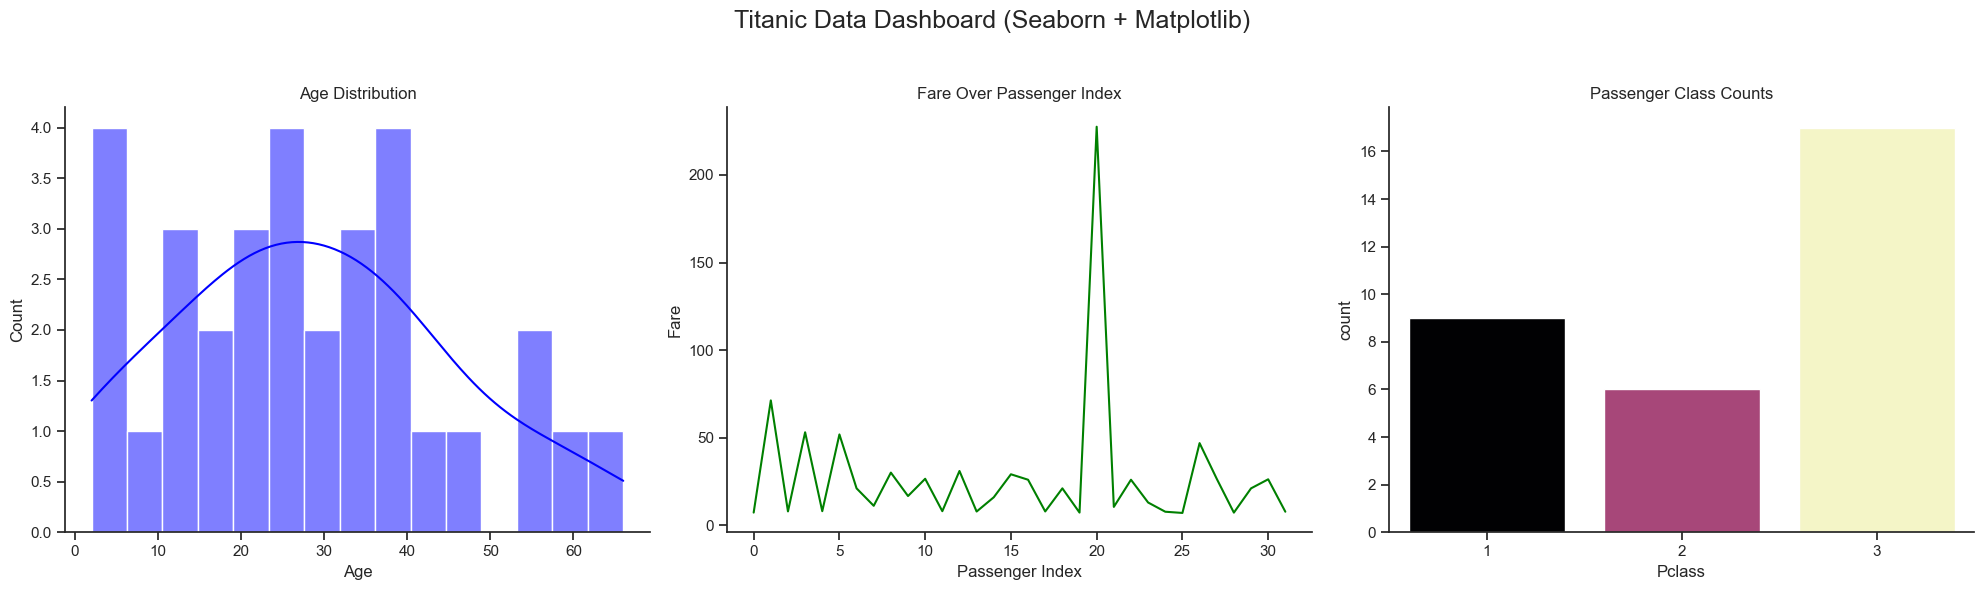


🎉 Part 9 complete! You've successfully mapped Pandas .plot() methods to their Seaborn equivalents.


In [4]:
print("🎯 LAB 9.4: PRACTICE PROJECT - Rebuilding the Dashboard")

# 1. Create the figure and grid of axes
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Titanic Data Dashboard (Seaborn + Matplotlib)", fontsize=18)

# 2. Plot 1: Age Histogram
sns.histplot(data=titanic_data, x='Age', ax=axes[0], kde=True, bins=15, color='blue')
axes[0].set_title('Age Distribution')

# 3. Plot 2: Fare Line Plot
# We'll plot Fare against the Passenger Index
sns.lineplot(data=titanic_data, x=titanic_data.index, y='Fare', ax=axes[1], color='green')
axes[1].set_title('Fare Over Passenger Index')
axes[1].set_xlabel('Passenger Index')

# 4. Plot 3: Pclass Bar Chart (Count Plot)
# We use countplot (which plots counts) and assign Pclass to hue to color the bars.
sns.countplot(
    data=titanic_data, 
    x='Pclass', 
    hue='Pclass', # Use Pclass for hue to apply palette
    ax=axes[2], 
    palette='magma',
    legend=False # Disable legend
)
axes[2].set_title('Passenger Class Counts')


# 5. Final Touches
plt.tight_layout(rect=[0, 0, 1, 0.95])
sns.despine()

# 6. Save the figure
fig.savefig('seaborn_part9_dashboard.png', dpi=300)
print("💾 Plot saved as 'seaborn_part9_dashboard.png'")

plt.show()

print("\n🎉 Part 9 complete! You've successfully mapped Pandas .plot() methods to their Seaborn equivalents.")